In [1]:
import qutip as qt
import numpy as np
import lmfit as lm
import matplotlib.pyplot as plt
from lmfit import Model
from scipy import constants
#_ = %precision 3

In [2]:
num_basis = 8
π = np.pi
hbar = constants.hbar

### $\hat a, \hat x, \hat p$

In [3]:
a = qt.destroy(num_basis)
adag = a.dag()

x = (a+a.dag())
p = (1j)*(a.dag()-a)

$H = \hbar\omega_0 (a^\dagger a + \frac{1}{2})$

$|\psi_0\rangle = |\alpha\rangle$



In [8]:
omega = 1
H = omega*(adag*a+0.5)

alpha0 = 1j
psi0 = qt.coherent(num_basis, alpha0)

In [9]:
times = np.linspace(0, 20, 201)
result = qt.mesolve(H, psi0, times)

In [10]:
var_x = []
var_p = []
for state in result.states:
    var_x.append(qt.variance(x, state))
    var_p.append(qt.variance(p, state))

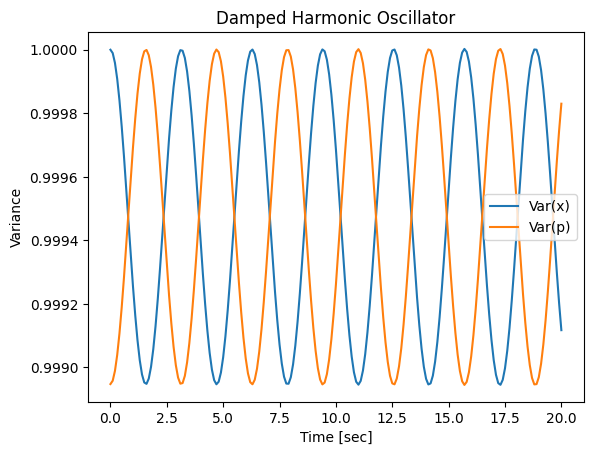

In [11]:
fig = plt.figure()
plt.plot(times, var_x, label='Var(x)')
plt.plot(times, np.array(var_p), label='Var(p)')
plt.ylabel('Variance')
plt.xlabel('Time [sec]')
plt.title('Damped Harmonic Oscillator')
plt.legend()